# CALORIES BURNED: Is it optimum of less?- A CASE STUDY


In [213]:
# Basic Packages
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px
import pandas as pd
import numpy as np
%matplotlib inline 

import datetime

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier


In [214]:
df= pd.read_excel('Calories1.xlsx')
df.tail()

,Id,Day,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,runDistance,TotalMinutesAsleep,TotalTimeInBed
935,8877689391,Wednesday,2019-06-27,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847,562,571,590
936,8877689391,Thursday,2019-06-28,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710,455,98,285
937,8877689391,Friday,2019-06-29,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832,419,571,590
938,8877689391,Saturday,2019-06-30,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832,253,121,195
939,8877689391,Sunday,2019-07-01,8064,6.120000,6.120000,0.0,1.82,0.04,4.25,0.00,23,1,137,770,1849,252,87,186


In [215]:
df['Month'] = df['ActivityDate'].dt.month
df['Year'] = df['ActivityDate'].dt.year
df['TimeTakenToSleep'] = df['TotalTimeInBed'] - df['TotalMinutesAsleep']

def score_judge(ex):
    if ex >= 2000:
        return 1  #Good Calories burned
    else:
        return 0   #Not much Calories burned
df.loc[:,'CaloriesBurned']=df.loc[:,'Calories'].apply(score_judge)
df.head()

from sklearn.preprocessing import OrdinalEncoder
#TimeTakenToSleep
def score_judge(ex):
    if ex >= 180:
        return "1" #High
    elif ex>=100:
        return "2" #Moderate
    else:
        return "0" #Less
df.loc[:,'Evaluation']=df.loc[:,'TimeTakenToSleep'].apply(score_judge)
df

print('Updated DataFrame:')
df

Updated DataFrame:


,Id,Day,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,...,SedentaryMinutes,Calories,runDistance,TotalMinutesAsleep,TotalTimeInBed,Month,Year,TimeTakenToSleep,CaloriesBurned,Evaluation
0,1503960366,Saturday,2016-12-04,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,...,728,1985,70,277,296,12,2016,19,0,0
1,1503960366,Sunday,2016-12-05,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,...,776,1797,2353,334,357,12,2016,23,0,0
2,1503960366,Monday,2016-12-06,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,...,1218,1776,944,362,392,12,2016,30,0,0
3,1503960366,Tuesday,2016-12-07,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,...,726,1745,853,290,317,12,2016,27,0,0
4,1503960366,Wednesday,2016-12-08,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,...,773,1863,336,650,662,12,2016,12,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,Wednesday,2019-06-27,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,...,1174,2847,562,571,590,6,2019,19,1,0
936,8877689391,Thursday,2019-06-28,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,...,1131,3710,455,98,285,6,2019,187,1,1
937,8877689391,Friday,2019-06-29,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,...,1187,2832,419,571,590,6,2019,19,1,0
938,8877689391,Saturday,2019-06-30,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,...,1127,3832,253,121,195,6,2019,74,1,0


In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   Day                       940 non-null    object        
 2   ActivityDate              940 non-null    datetime64[ns]
 3   TotalSteps                940 non-null    int64         
 4   TotalDistance             940 non-null    float64       
 5   TrackerDistance           940 non-null    float64       
 6   LoggedActivitiesDistance  940 non-null    float64       
 7   VeryActiveDistance        940 non-null    float64       
 8   ModeratelyActiveDistance  940 non-null    float64       
 9   LightActiveDistance       940 non-null    float64       
 10  SedentaryActiveDistance   940 non-null    float64       
 11  VeryActiveMinutes         940 non-null    int64         
 12  FairlyActiveMinutes   

In [54]:
# EDA
for column_headers in df.columns: 
    print(column_headers)

Id
Day
ActivityDate
TotalSteps
TotalDistance
TrackerDistance
LoggedActivitiesDistance
VeryActiveDistance
ModeratelyActiveDistance
LightActiveDistance
SedentaryActiveDistance
VeryActiveMinutes
FairlyActiveMinutes
LightlyActiveMinutes
SedentaryMinutes
Calories
runDistance
TotalMinutesAsleep
TotalTimeInBed
Month
Year
TimeTakenToSleep
CaloriesBurned
Evaluation


Text(0.5, 1.0, 'FIGURE 1: Calories Burned from 2016 to 2019')

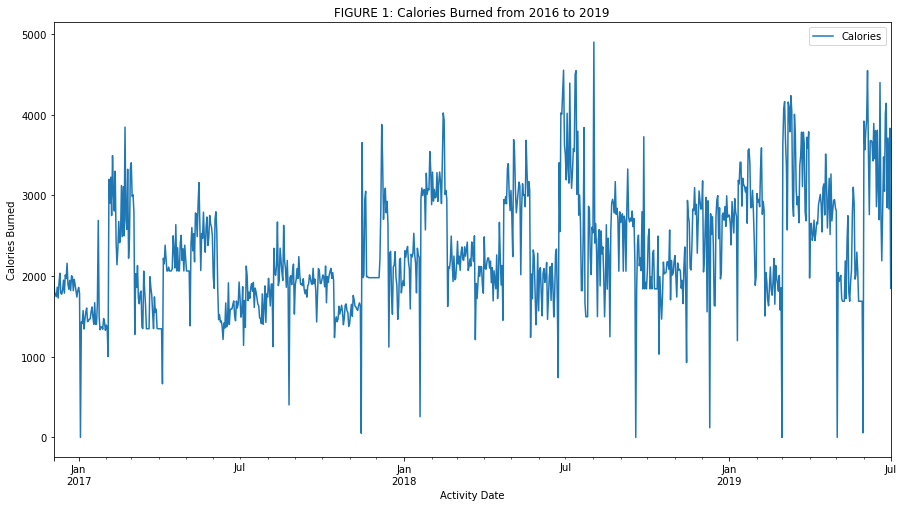

In [55]:
df.plot(x='ActivityDate',y='Calories',figsize=(15,8))
plt.xlabel("Activity Date")
plt.ylabel("Calories Burned")
plt.title("FIGURE 1: Calories Burned from 2016 to 2019")

Text(0.5, 1.0, 'FIGURE 2: Statistical Description of Calories Burned in each month')

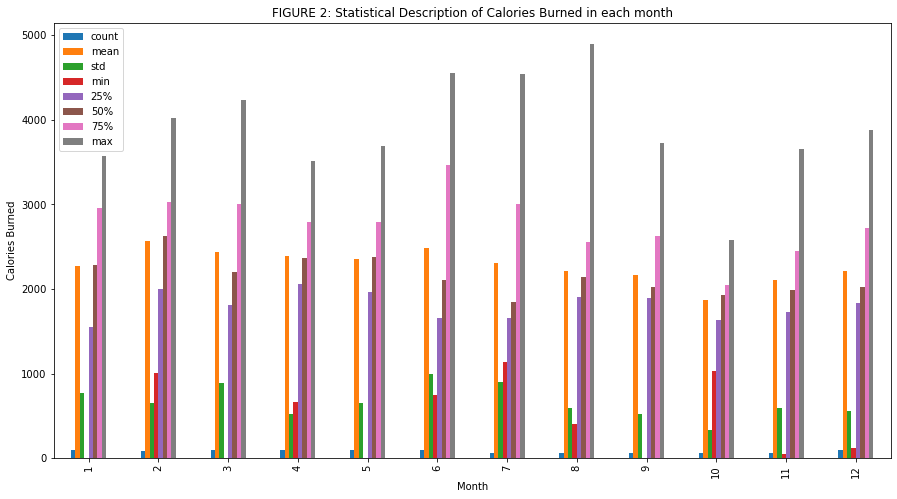

In [56]:
df.groupby('Month')['Calories'].describe().plot.bar(figsize=(15,8))
plt.xlabel("Month")
plt.ylabel("Calories Burned")
plt.title("FIGURE 2: Statistical Description of Calories Burned in each month")

Text(0.5, 1.0, 'FIGURE 3: Statistical Description of Calories Burned each Day of the Week')

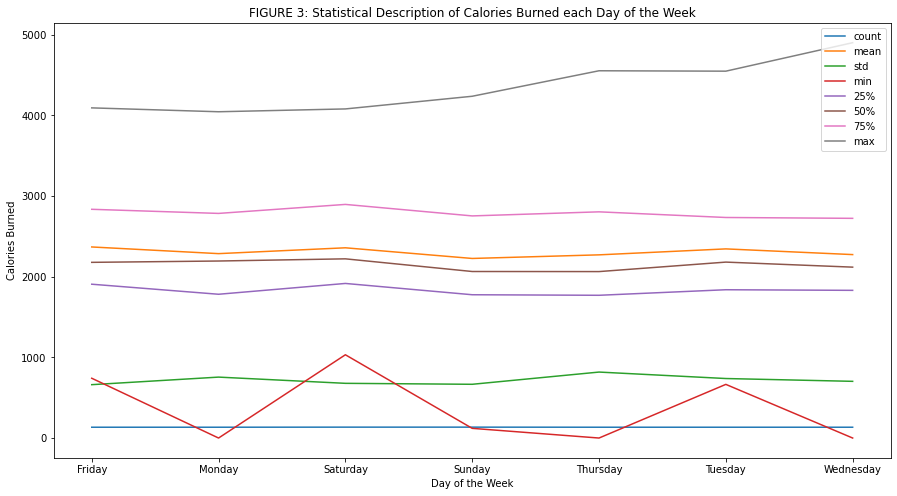

In [57]:
df.groupby('Day')['Calories'].describe().plot(figsize=(15,8))
plt.xlabel("Day of the Week")
plt.ylabel("Calories Burned")
plt.title("FIGURE 3: Statistical Description of Calories Burned each Day of the Week")

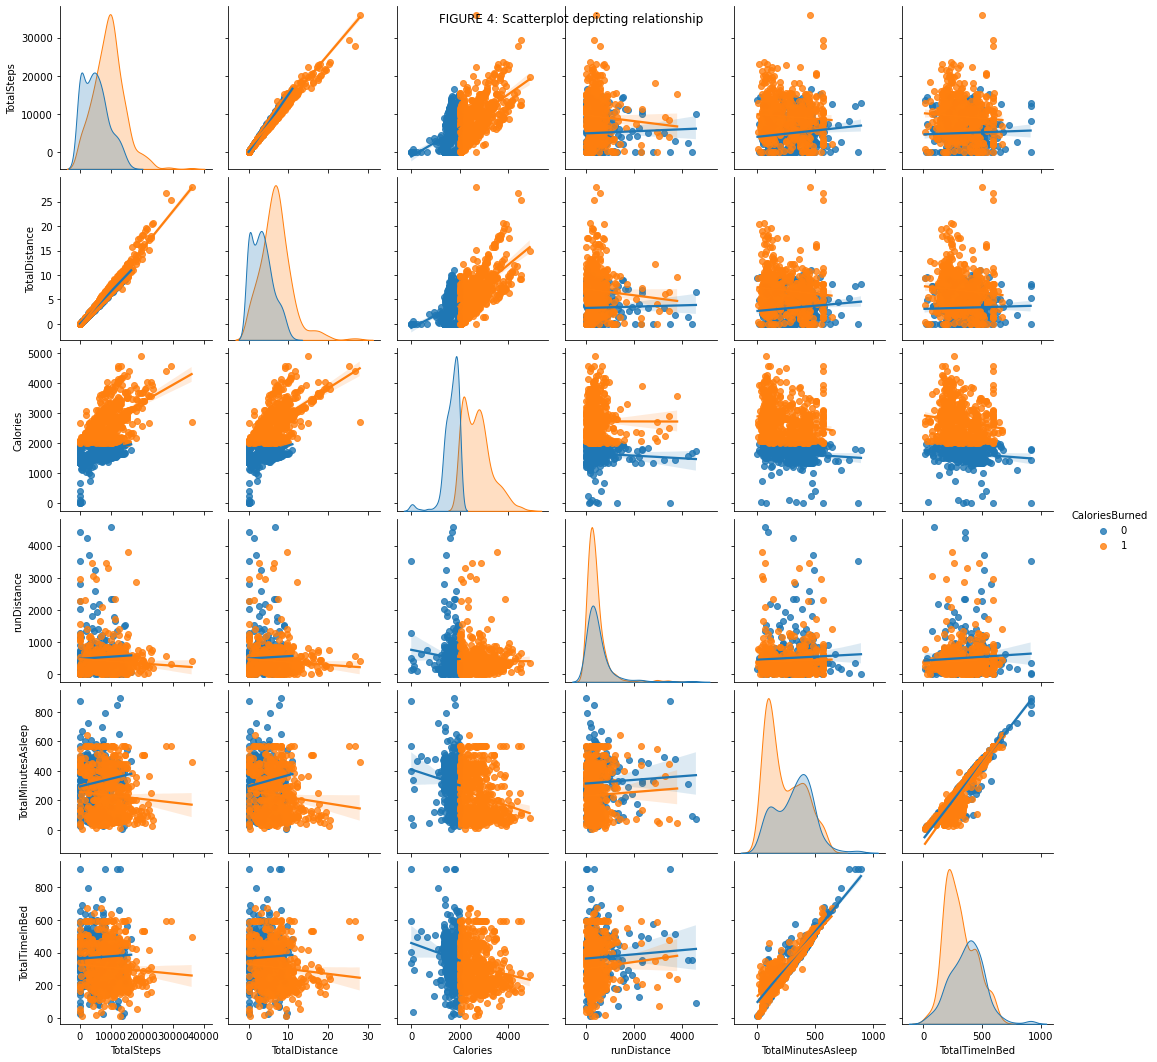

In [58]:
g=sns.pairplot(df,kind='reg',vars=['TotalSteps','TotalDistance','Calories','runDistance','TotalMinutesAsleep',
'TotalTimeInBed'],hue="CaloriesBurned")
g.fig.suptitle("FIGURE 4: Scatterplot depicting relationship ")
plt.show()

# PROPER EDA

Using the data to find trends and relationship among the variables present by reviewing the following questions:
1. The days of the week the users were found to the most and the least active based on the number of steps taken.
2. Days when they use the devices the most often.
3. How much low, moderate, high device usage a person does
4. Relationship between the number of steps taken and calories
5. How much different is the time slept and the time spend in bed
6. Is there a relationship between the time slept and the calories lost
7. Time of the day the users are the most active.

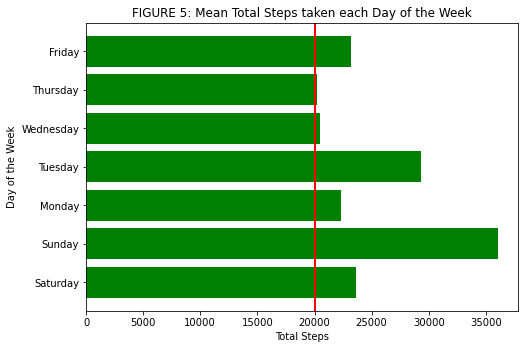

In [59]:
# 1.
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
TotalSteps = df.TotalSteps
Day = df.Day
ax.barh(Day,TotalSteps,color=['green'])  
ax.axvline(20000, color='red', linewidth=2)
plt.xlabel("Total Steps")
plt.ylabel("Day of the Week")
plt.title("FIGURE 5: Mean Total Steps taken each Day of the Week")
plt.show()

## Analysis:
1. Users are most active on Sundays while least active on Thursday
2. A study conducted in 2011 revealed that healthy adults can easily take between 4,000-18,000 steps per day. It is recommended that most adults should aim for 20,000 steps per day. In this the user takes more than the recommended steps every day.


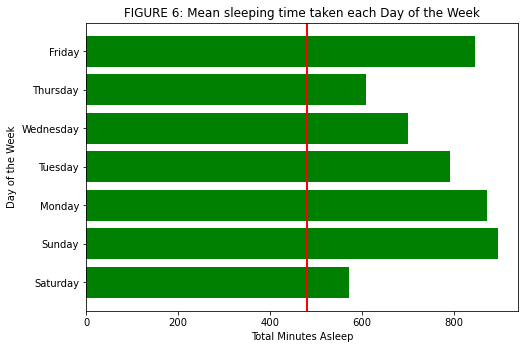

In [60]:
# 2.
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
TotalMinutesAsleep = df.TotalMinutesAsleep
Day = df.Day
ax.barh(Day,TotalMinutesAsleep,color=['green'])  
ax.axvline(480, color='red', linewidth=2)
plt.xlabel("Total Minutes Asleep")
plt.ylabel("Day of the Week")
plt.title("FIGURE 6: Mean sleeping time taken each Day of the Week")
plt.show()

## Analysis:
1. Users have slept most on Sundays followed by Mondays.
2. It is recommended that most adults should aim for 7-8 hours sleep per day. In this the user takes more than the recommended steps every day.

Text(0.5, 1.0, 'FIGURE 7:Category of time taken by User to sleep')

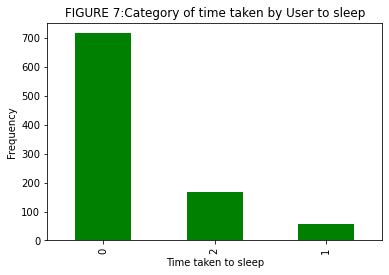

In [61]:
# 3.
pd.value_counts(df['Evaluation']).plot.bar(color='green')
plt.xlabel("Time taken to sleep")
plt.ylabel("Frequency")
plt.title("FIGURE 7:Category of time taken by User to sleep")

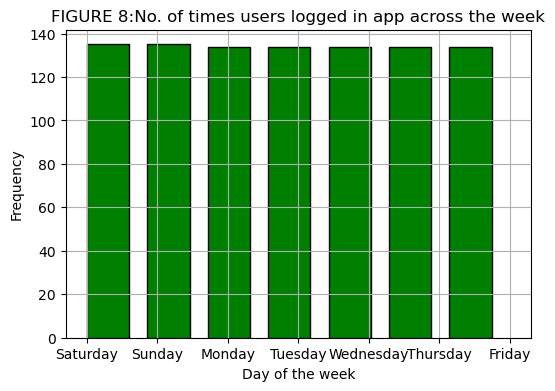

In [62]:
plt.style.use("default")
plt.figure(figsize=(6,4)) # specify size of the chart
plt.hist(df.Day, bins = 7, width = 0.6, color = "GREEN", edgecolor = "black")

# adding annotations and visuals
plt.xlabel("Day of the week")
plt.ylabel("Frequency")
plt.title("FIGURE 8:No. of times users logged in app across the week")
plt.grid(True)
plt.show()

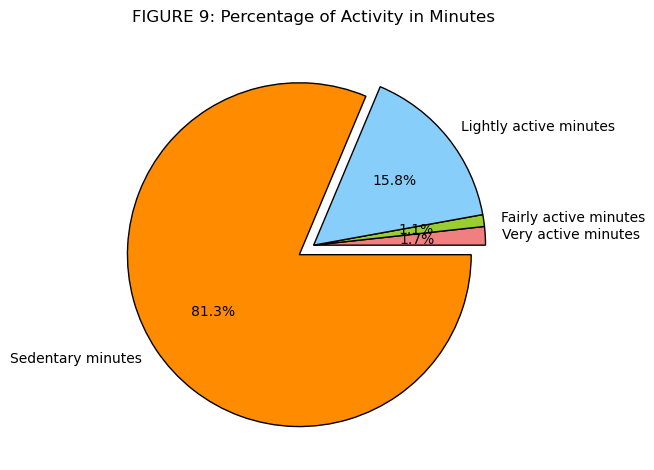

In [63]:
# calculating total of individual minutes column
very_active_mins = df["VeryActiveMinutes"].sum()
fairly_active_mins = df["FairlyActiveMinutes"].sum()
lightly_active_mins = df["LightlyActiveMinutes"].sum()
sedentary_mins = df["SedentaryMinutes"].sum()

# plotting pie chart
slices = [very_active_mins, fairly_active_mins, lightly_active_mins, sedentary_mins]
labels = ["Very active minutes", "Fairly active minutes", "Lightly active minutes", "Sedentary minutes"]
colours = ["lightcoral", "yellowgreen", "lightskyblue", "darkorange"]
explode = [0, 0, 0, 0.1]
plt.style.use("default")
plt.pie(slices, labels = labels, 
        colors = colours, wedgeprops = {"edgecolor": "black"}, 
        explode = explode, autopct = "%1.1f%%")
plt.title("FIGURE 9: Percentage of Activity in Minutes")
plt.tight_layout()
plt.show()

## Interpretation
As seen from the pie chart,

Sedentary minutes takes the biggest slice at 81.3%.

This indicates that users are using the FitBit app to log daily activities such as daily commute, inactive movements (moving from one spot to another) or running errands.

App is rarely being used to track fitness (ie. running) as per the minor percentage of fairly active activity (1.1%) and very active activity (1.7%). This is highly discouraging as FitBit app was developed to encourage fitness.

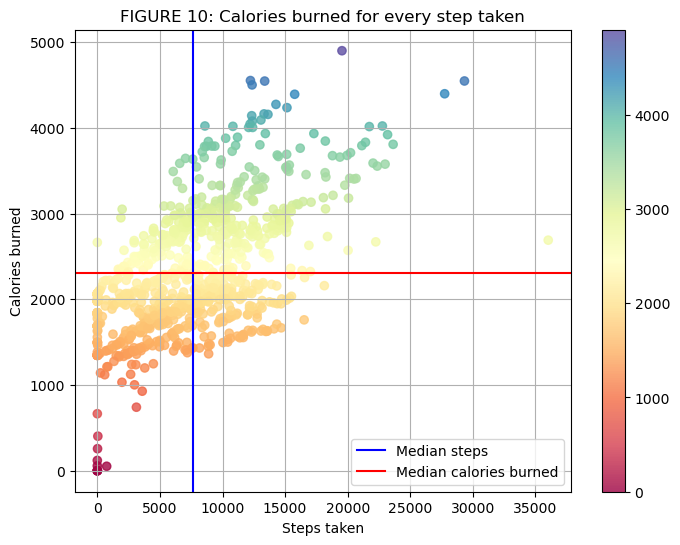

In [64]:
plt.style.use("default")
plt.figure(figsize=(8,6)) # Specify size of the chart
plt.scatter(df.TotalSteps, df.Calories, 
            alpha = 0.8, c = df.Calories, 
            cmap = "Spectral")

median_calories = 2303
median_steps = 7637

plt.colorbar(orientation = "vertical")
plt.axvline(median_steps, color = "Blue", label = "Median steps")
plt.axhline(median_calories, color = "Red", label = "Median calories burned")
plt.xlabel("Steps taken")
plt.ylabel("Calories burned")
plt.title("FIGURE 10: Calories burned for every step taken")
plt.grid(True)
plt.legend()
plt.show()

## Interpretation
From the scatter plot, we discovered that:

It is a positive correlation.

We observed that intensity of calories burned increase when users are at the range of > 0 to 15,000 steps with calories burn rate cooling down from 15,000 steps onwards.

Noted a few outliers:

Zero steps with zero to minimal calories burned.
1 observation of > 35,000 steps with < 3,000 calories burned.
Deduced that outliers could be due to natural variation of data, change in user's usage or errors in data collection (ie. miscalculations, data contamination or human error).

In [65]:
cor = df[['TotalSteps','Calories', 'SedentaryMinutes', 'TotalTimeInBed', 'TotalMinutesAsleep']].corr()
cor. style. background_gradient (cmap = 'BrBG')  

,TotalSteps,Calories,SedentaryMinutes,TotalTimeInBed,TotalMinutesAsleep
TotalSteps,1.000000,0.591568,-0.327484,-0.113992,-0.109648
Calories,0.591568,1.000000,-0.106973,-0.245805,-0.299968
SedentaryMinutes,-0.327484,-0.106973,1.000000,0.151073,0.113810
TotalTimeInBed,-0.113992,-0.245805,0.151073,1.000000,0.935367
TotalMinutesAsleep,-0.109648,-0.299968,0.113810,0.935367,1.000000


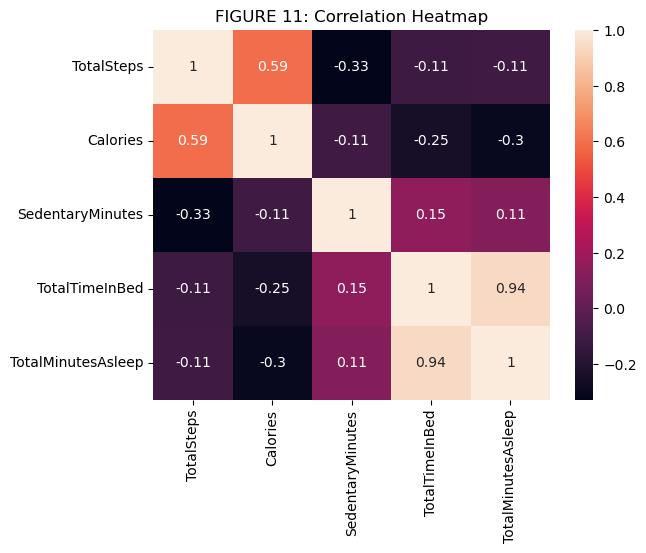

In [71]:
ax = plt.axes()
sns.heatmap(cor,annot = True, ax = ax)

ax.set_title('FIGURE 11: Correlation Heatmap')
plt.show()

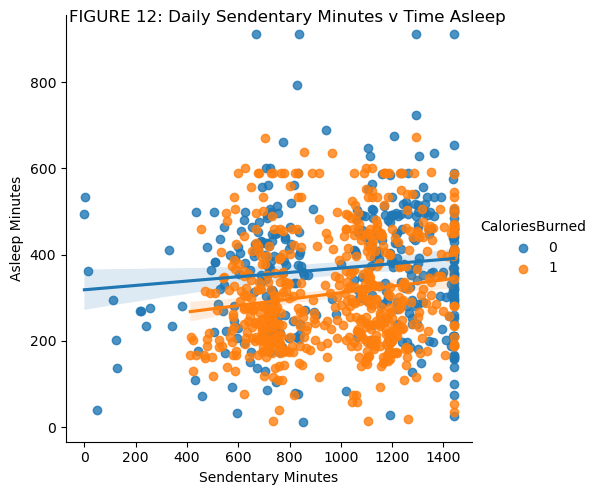

In [72]:
daily_sedentary_bed_time = sns.lmplot(x='SedentaryMinutes', y='TotalTimeInBed', data=df,hue='CaloriesBurned')
daily_sedentary_bed_time.fig.suptitle('FIGURE 12: Daily Sendentary Minutes v Time Asleep')
daily_sedentary_bed_time.set_axis_labels('Sendentary Minutes', 'Asleep Minutes')

# MODELS


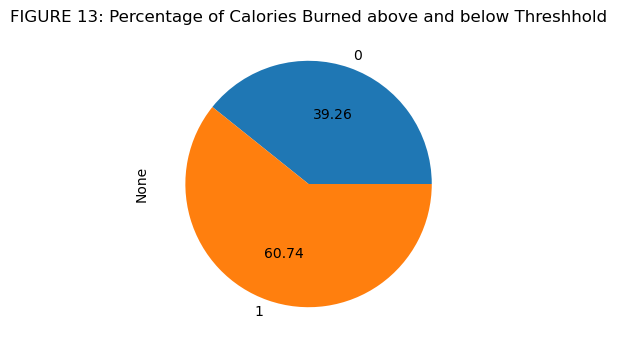

In [73]:
df.groupby('CaloriesBurned').size().plot(kind='pie', autopct='%.2f',figsize=(4,4))
plt.title("FIGURE 13: Percentage of Calories Burned above and below Threshhold")
plt.show()

No SMOTE is required since it's (almost) in 3:2 ratio.

In [74]:
# EDA
for column_headers in df.columns: 
    print(column_headers)

Id
Day
ActivityDate
TotalSteps
TotalDistance
TrackerDistance
LoggedActivitiesDistance
VeryActiveDistance
ModeratelyActiveDistance
LightActiveDistance
SedentaryActiveDistance
VeryActiveMinutes
FairlyActiveMinutes
LightlyActiveMinutes
SedentaryMinutes
Calories
runDistance
TotalMinutesAsleep
TotalTimeInBed
Month
Year
TimeTakenToSleep
CaloriesBurned
Evaluation


In [217]:
df2=df.drop(['ActivityDate','Id','Day','Month','Year','Calories','Evaluation'],axis=1)

In [218]:
from sklearn.metrics import mean_squared_error
X=df2.drop('CaloriesBurned',axis=1)
y=df2['CaloriesBurned']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=24)
Mnames = []
Mscore = []
Mrmse=[]

In [219]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
print("Logistic Regression Classification Test Accuracy {}".format(log_reg.score(X_test,y_test)))
Mnames.append("Logistic Reg.")
Mscore.append(log_reg.score(X_test,y_test))

y_pred_LR = log_reg.predict(X_test)
a1=round(np.sqrt(mean_squared_error(y_test, y_pred_LR)),3)
print("RMSE:",a1)
Mrmse.append(a1)
conf_mat = confusion_matrix(y_test,y_pred_LR)
conf_mat

Logistic Regression Classification Test Accuracy 0.6808510638297872
RMSE: 0.565


array([[36, 40],
       [20, 92]], dtype=int64)

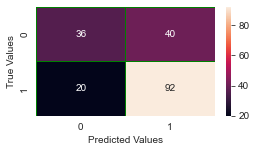

In [220]:
f, ax = plt.subplots(figsize=(4,2))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="green",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

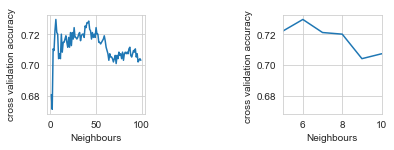

In [221]:
K_range=range(0,100)
K_range1=range(5,10)
K_scores =[]
#prepare the cross-validation procedure
cv1=KFold(n_splits=10,random_state=1,shuffle=True)

#use iteration to calculator different k in models, then return the average according
for K in K_range:
    Knn=KNeighborsClassifier(n_neighbors=K)
    scores = cross_val_score(Knn,X,y,cv=cv1,scoring='accuracy')
    K_scores.append(scores.mean())

plt.subplot(2, 3, 1)
plt.plot(K_range,K_scores)
plt.xlabel('Neighbours')
plt.ylabel('cross validation accuracy')

plt.subplot(2, 3, 3)
plt.plot(K_range,K_scores)
plt.xlim([5,10])
plt.xlabel('Neighbours')
plt.ylabel('cross validation accuracy ')
plt.show()

In [222]:
# KNN (K-Nearest Neighbour) CLASSIFICATION
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)
print("Score for Number of Neighbors = 6: {}".format(knn.score(X_test,y_test)))
Mnames.append("KNN")
Mscore.append(knn.score(X_test,y_test))

y_pred_KNN = knn.predict(X_test)
a1=round(np.sqrt(mean_squared_error(y_test, y_pred_KNN)),3)
print("RMSE:",a1)
Mrmse.append(a1)
conf_mat = confusion_matrix(y_test,y_pred_KNN)


Score for Number of Neighbors = 6: 0.6861702127659575
RMSE: 0.56


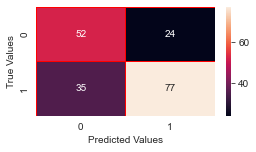

In [223]:
f, ax = plt.subplots(figsize=(4,2))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

In [224]:
# Function that handles sample splitting, model fitting and report printing
def mfunc(X, y, typ):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state=23)
    model = typ
    clf = model.fit(X_train, y_train)
    pred_labels = model.predict(X_test)
    print('Classes: ', clf.classes_) # class labels known to the classifier
    if str(typ)=='GaussianNB()':    
        print('Class Priors: ',clf.class_prior_) # prior probability of each
    else:        
        print('Class Log Priors: ',clf.class_log_prior_) # log prior probability of each class.
# Use score method to get accuracy of the model
    print('--------------------------------------------------------')
    score = model.score(X_test, y_test)
    print('Accuracy Score: ', score)
    print('--------------------------------------------------------')
        # Look at classification report to evaluate the model
    print(classification_report(y_test, pred_labels))
    # Return relevant data for chart plotting
    return X_train, X_test, y_train, y_test, clf, pred_labels

In [225]:
X_train, X_test, y_train, y_test, clf, pred_labels = mfunc(X, y, GaussianNB())

Classes:  [0 1]
Class Priors:  [0.40957447 0.59042553]
--------------------------------------------------------
Accuracy Score:  0.6728723404255319
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.53      0.89      0.67       138
           1       0.90      0.55      0.68       238

    accuracy                           0.67       376
   macro avg       0.71      0.72      0.67       376
weighted avg       0.76      0.67      0.67       376



In [226]:
# NAIVE BAYES
naive_bayes = GaussianNB()
naive_bayes.fit(X_test,y_test)
print("Naive Bayes Classification Score: {}".format(naive_bayes.score(X_test,y_test)))
Mnames.append("Naive Bayes")
Mscore.append(naive_bayes.score(X_test,y_test))

#Confusion Matrix
y_pred_GNB = naive_bayes.predict(X_test)
a1=round(np.sqrt(mean_squared_error(y_test, y_pred_GNB)),3)
print("RMSE:",a1)
Mrmse.append(a1)
conf_mat = confusion_matrix(y_test,y_pred_GNB)

Naive Bayes Classification Score: 0.6835106382978723
RMSE: 0.563


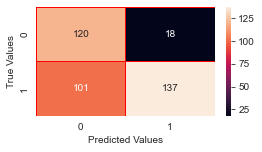

In [227]:
f, ax = plt.subplots(figsize=(4,2))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

In [228]:
from sklearn.tree import DecisionTreeClassifier
maxdepth = (1,10,50,100)
maxleafnodes = (2,10,50,100)
results = []

for i in maxdepth:
    for j in maxleafnodes:
            # Train the model
            model = DecisionTreeClassifier(random_state=42,max_depth=i,max_leaf_nodes=j)
            model.fit(X_train, y_train)
            pred = model.predict(X_test)
            # Append current results
            results.append({
                'Model_Accuracy': round(accuracy_score(y_test,pred), 5),
                'MAX_DEPTH': i,
                'MAX LEAF NODES': j
            })
    
#Convert to Pandas DataFrame and sort descendingly by accuracy
results = pd.DataFrame(results)
results = results.sort_values(by='Model_Accuracy', ascending=False)
results


,Model_Accuracy,MAX_DEPTH,MAX LEAF NODES
5,0.77128,10,10
9,0.77128,50,10
13,0.77128,100,10
6,0.75266,10,50
10,0.73936,50,50
14,0.73936,100,50
11,0.73404,50,100
15,0.73404,100,100
0,0.72606,1,2
1,0.72606,1,10


In [229]:
from sklearn.tree import plot_tree
dt1= DecisionTreeClassifier(max_depth=10,max_leaf_nodes=10,random_state=42) 
clf1=dt1.fit(X_train,y_train)

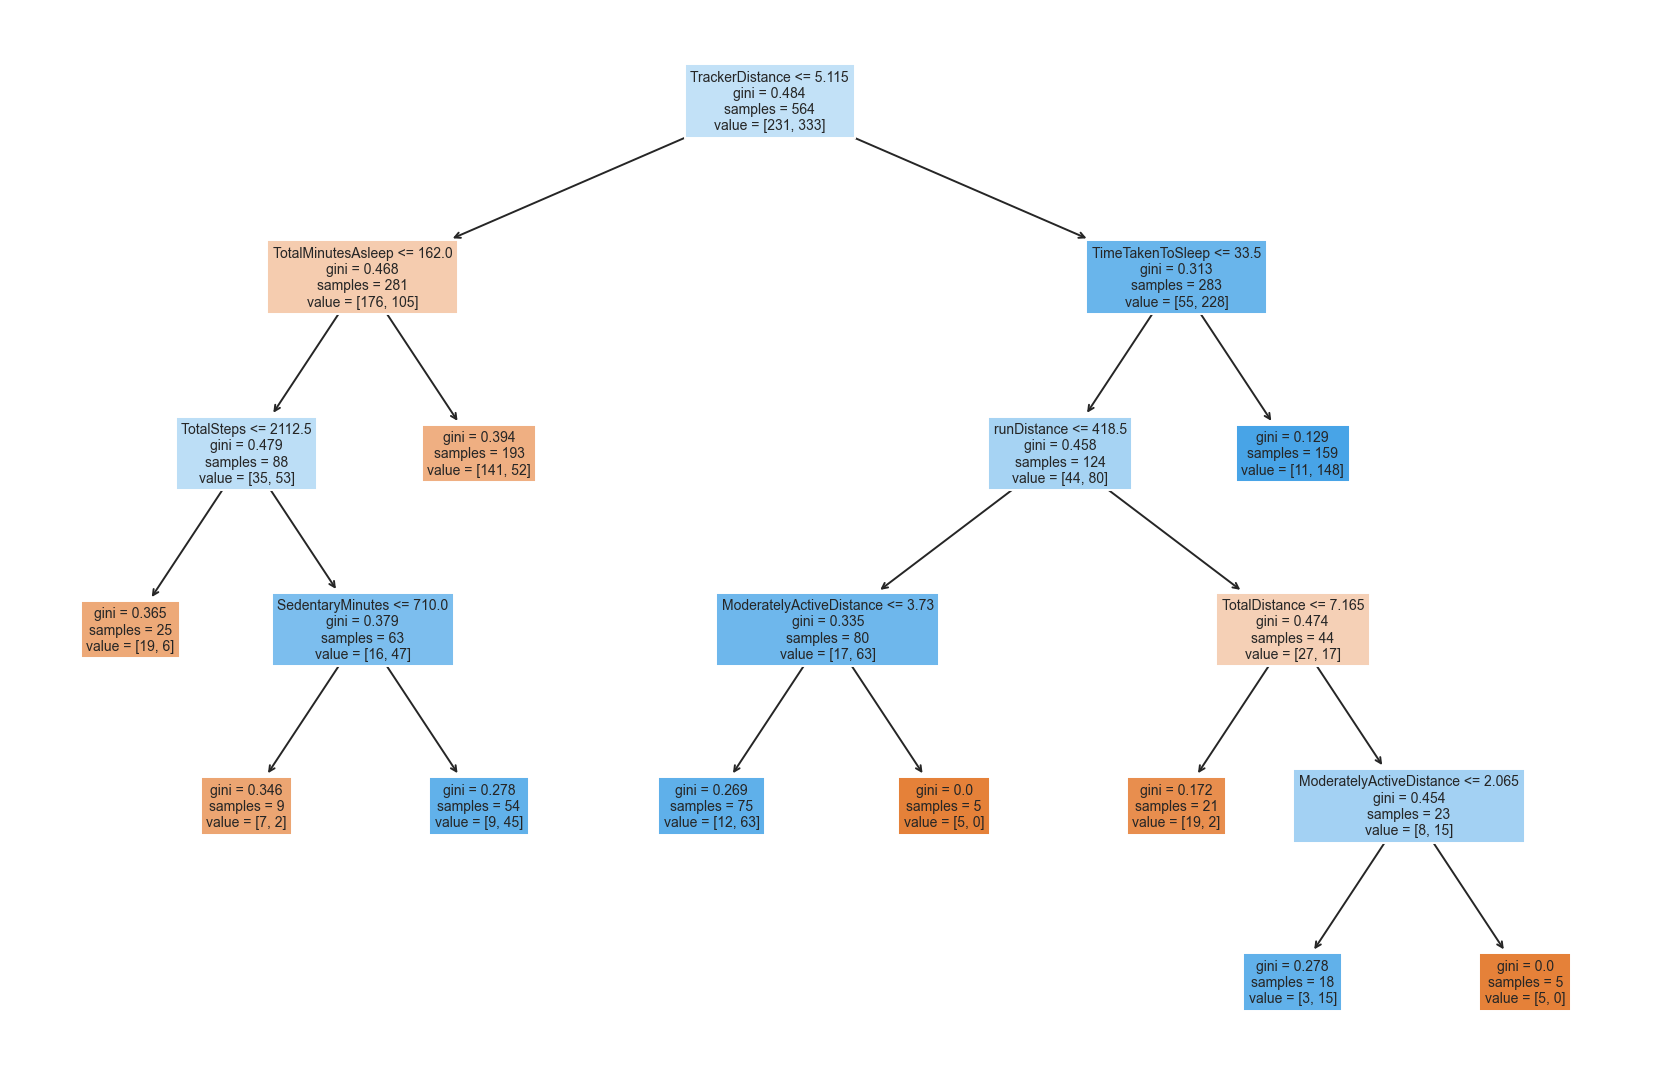

In [230]:
plt.figure(figsize=(15,10),dpi=140)
plot_tree(clf1,feature_names=X_train.columns,filled = True)
plt.show()

In [231]:
# DECISION TREE
dec_tree = DecisionTreeClassifier(max_depth=10,max_leaf_nodes=10,random_state=42)
dec_tree.fit(X_train,y_train)
print("Decision Tree Classification Score: ",dec_tree.score(X_test,y_test))
Mnames.append("Decision Tree")
Mscore.append(dec_tree.score(X_test,y_test))

y_pred_DT = dec_tree.predict(X_test)
a1=round(np.sqrt(mean_squared_error(y_test, y_pred_DT)),3)
print("RMSE:",a1)
Mrmse.append(a1)
conf_mat = confusion_matrix(y_test,y_pred_DT)

Decision Tree Classification Score:  0.7712765957446809
RMSE: 0.478


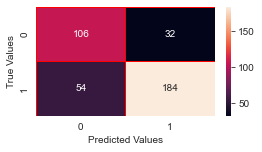

In [232]:
f, ax = plt.subplots(figsize=(4,2))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

In [233]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rand_forest = RandomForestClassifier(n_estimators=50, random_state=42)
rand_forest.fit(X_train,y_train)
print("Random Forest Classification Score: ",rand_forest.score(X_test,y_test))
Mnames.append("Random Forest")
Mscore.append(rand_forest.score(X_test,y_test))

y_pred_RF = rand_forest.predict(X_test)
a1=round(np.sqrt(mean_squared_error(y_test, y_pred_RF)),3)
print("RMSE:",a1)
Mrmse.append(a1)
conf_mat = confusion_matrix(y_test,y_pred_RF)

Random Forest Classification Score:  0.7898936170212766
RMSE: 0.458


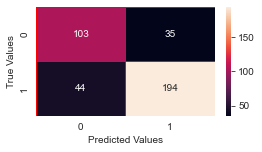

In [234]:
f, ax = plt.subplots(figsize=(4,2))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

In [171]:
model_params  = {
    "decision_tree":{
        "model": DecisionTreeClassifier(),
        "params":{
            'criterion':["entropy","gini"],
            "max_depth":[1,10,50,100]
        }
    },
    "random_forest":{
        "model": RandomForestClassifier(),
        "params":{
            "n_estimators":[1,20,50,70],
            "max_depth":[1,10,50,100]
        }
    },
    "naive_bayes":{
        "model": GaussianNB(),
        "params":{}
    },
    'logistic_regression' : {
        'model' : LogisticRegression(solver='liblinear',multi_class = 'auto'),
        'params': {
            "C" : [1,5,10]
        }
    }   
}

model_params

{'decision_tree': {'model': DecisionTreeClassifier(),
  'params': {'criterion': ['entropy', 'gini'], 'max_depth': [1, 10, 50, 100]}},
 'random_forest': {'model': RandomForestClassifier(),
  'params': {'n_estimators': [1, 20, 50, 70], 'max_depth': [1, 10, 50, 100]}},
 'naive_bayes': {'model': GaussianNB(), 'params': {}},
 'logistic_regression': {'model': LogisticRegression(solver='liblinear'),
  'params': {'C': [1, 5, 10]}}}

In [172]:
from sklearn.model_selection import GridSearchCV

scoree=[]
for model,mp in model_params.items():
    clf = GridSearchCV(mp["model"],mp["params"],cv=6,return_train_score=True)
    clf.fit(X,y)
    scoree.append({
        "Model" : model,
        "Best_Score": clf.best_score_,
        "Best_Params": clf.best_params_
    })
df4 = pd.DataFrame(scoree,columns=["Model","Best_Score","Best_Params"])
df4

,Model,Best_Score,Best_Params
0,decision_tree,0.700269,"{'criterion': 'gini', 'max_depth': 1}"
1,random_forest,0.715084,"{'max_depth': 1, 'n_estimators': 20}"
2,naive_bayes,0.650301,{}
3,logistic_regression,0.742705,{'C': 10}


In [235]:
data = {'Models_Used': Mnames,
        'Accuracy_Score': Mscore,
        'RMSE':Mrmse}

cm = sns.light_palette("green", as_cmap=True)

s = df.style.background_gradient(cmap=cm)
s
# Create DataFrame
dff = pd.DataFrame(data)
s = dff.loc[:8].style.background_gradient(cmap='viridis')
s

,Models_Used,Accuracy_Score,RMSE
0,Logistic Reg.,0.680851,0.565000
1,KNN,0.686170,0.560000
2,Naive Bayes,0.683511,0.563000
3,Decision Tree,0.771277,0.478000
4,Random Forest,0.789894,0.458000


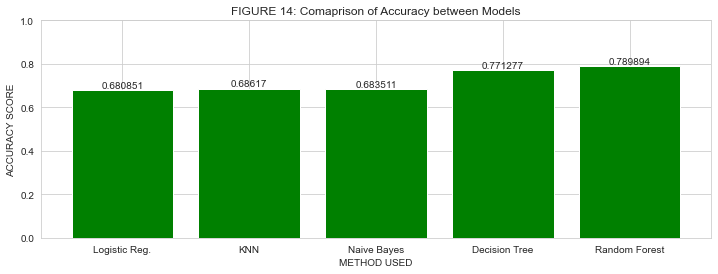

In [236]:
fig, ax = plt.subplots(figsize=(12,4))
plt.ylim([0,1])
plt.xlabel('METHOD USED')
plt.ylabel('ACCURACY SCORE')
plt.bar(dff.Models_Used,dff.Accuracy_Score,color = "green")
ax.bar_label(ax.containers[0])
plt.title("FIGURE 14: Comaprison of Accuracy between Models")
plt.show()

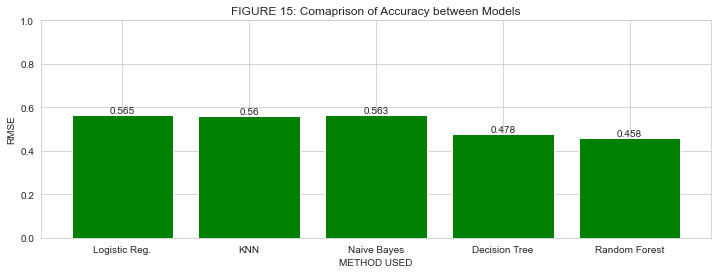

In [237]:
fig, ax = plt.subplots(figsize=(12,4))
plt.ylim([0,1])
plt.xlabel('METHOD USED')
plt.ylabel('RMSE')
plt.bar(dff.Models_Used,dff.RMSE,color = "green")
ax.bar_label(ax.containers[0])
plt.title("FIGURE 15: Comaprison of Accuracy between Models")

plt.show()

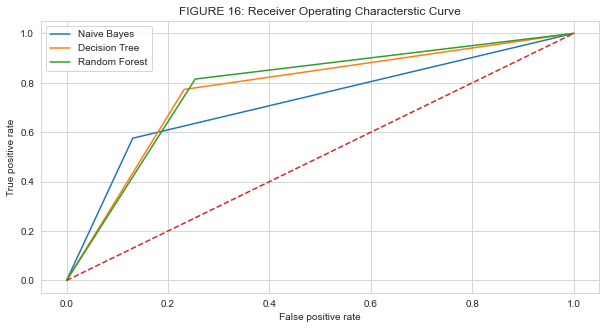

In [243]:
# PLOTTING ROC
from sklearn.metrics import roc_curve
#lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,y_pred_LR)
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test,y_pred_GNB)
#knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,y_pred_KNN)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,y_pred_DT)
RF_false_positive_rate,RF_true_positive_rate,dt_threshold = roc_curve(y_test,y_pred_RF)

sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('FIGURE 16: Receiver Operating Characterstic Curve')
#plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes')
#plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Decision Tree')
plt.plot(RF_false_positive_rate,RF_true_positive_rate,label='Random Forest')
plt.plot([0,1],ls='--')

plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()